# Corn wet milling data

In [1]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# allow plots to appear directly in the notebook
%matplotlib inline

In [2]:
inputd = pd.read_excel(r'S2.xlsx', sheet_name = 'Input value')

In [4]:
inputd.head(5)

,Year,Corn $/bu,Starch $/cwt,Gluten feed $/ton,Gluten meal $/ton,Natural gas $/MBTU,Electricity cents/kwh,Starch $/kg,Gluten feed $/kg,Gluten meal $/kg,Corn $/kg,Electricity $/kwh
0,1980,3.11,13.093333,108.500000,260.000000,1.695,3.70,0.257731,0.119601,0.286601,0.122435,0.0370
1,1985,2.23,9.685833,86.166667,209.112500,2.750,4.97,0.190657,0.094982,0.230507,0.087791,0.0497
2,1990,2.28,11.019167,98.956667,241.016667,2.415,4.74,0.216903,0.109081,0.265675,0.089760,0.0474
3,1995,3.24,15.975000,119.312500,325.962500,3.590,4.66,0.314454,0.131519,0.359312,0.127553,0.0466
4,2000,1.85,12.435000,60.546667,252.021667,4.450,4.64,0.244772,0.066741,0.277806,0.072831,0.0464


In [4]:
Outputd = pd.read_excel(r'S2.xlsx', sheet_name = 'Output value')

In [5]:
Outputd

,Year,Gross Margin %,ROI %,Payback time
0,1980,26.56,42.85,2.33
1,1985,26.22,35.18,2.84
2,1990,33.49,46.11,2.17
3,1995,34.76,61.08,1.64
4,2000,44.68,60.52,1.65
5,2005,37.44,51.73,1.93
6,2010,22.12,51.40,1.95
7,2015,24.88,45.26,2.21


In [5]:
inputd.index

RangeIndex(start=0, stop=8, step=1)

In [6]:
inputd.columns

Index(['Year', 'Corn $/bu', 'Starch $/cwt', 'Gluten feed $/ton',
       'Gluten meal $/ton', 'Natural gas $/MBTU', 'Electricity cents/kwh',
       'Starch $/kg', 'Gluten feed $/kg', 'Gluten meal $/kg', 'Corn $/kg',
       'Electricity $/kwh'],
      dtype='object')

In [6]:
df = pd.merge(inputd, Outputd)
display(df)
df.columns

,Year,Corn $/bu,Starch $/cwt,Gluten feed $/ton,Gluten meal $/ton,Natural gas $/MBTU,Electricity cents/kwh,Starch $/kg,Gluten feed $/kg,Gluten meal $/kg,Corn $/kg,Electricity $/kwh,Gross Margin %,ROI %,Payback time
0,1980,3.11,13.093333,108.500000,260.000000,1.695,3.70,0.257731,0.119601,0.286601,0.122435,0.0370,26.56,42.85,2.33
1,1985,2.23,9.685833,86.166667,209.112500,2.750,4.97,0.190657,0.094982,0.230507,0.087791,0.0497,26.22,35.18,2.84
2,1990,2.28,11.019167,98.956667,241.016667,2.415,4.74,0.216903,0.109081,0.265675,0.089760,0.0474,33.49,46.11,2.17
3,1995,3.24,15.975000,119.312500,325.962500,3.590,4.66,0.314454,0.131519,0.359312,0.127553,0.0466,34.76,61.08,1.64
4,2000,1.85,12.435000,60.546667,252.021667,4.450,4.64,0.244772,0.066741,0.277806,0.072831,0.0464,44.68,60.52,1.65
5,2005,2.00,12.175000,56.179167,268.725833,8.560,5.73,0.239655,0.061927,0.296219,0.078736,0.0573,37.44,51.73,1.93
6,2010,5.18,20.160000,149.087500,540.551667,5.490,6.77,0.396832,0.164341,0.595856,0.203927,0.0677,22.12,51.40,1.95
7,2015,3.61,14.682500,96.320000,486.714167,3.930,6.91,0.289013,0.106175,0.536510,0.142119,0.0691,24.88,45.26,2.21


Index(['Year', 'Corn $/bu', 'Starch $/cwt', 'Gluten feed $/ton',
       'Gluten meal $/ton', 'Natural gas $/MBTU', 'Electricity cents/kwh',
       'Starch $/kg', 'Gluten feed $/kg', 'Gluten meal $/kg', 'Corn $/kg',
       'Electricity $/kwh', 'Gross Margin %', 'ROI %', 'Payback time'],
      dtype='object')

In [39]:
df1 = df.loc[:,['Corn $/kg','Natural gas $/MBTU','Electricity $/kwh','Starch $/kg','Gluten feed $/kg', 'Gluten meal $/kg', 'Gross Margin %', 'ROI %', 'Payback time']]
df1 #subset the input and output value
df1.columns = df1.columns.str.replace(' ', '_')
df1.columns = df1.columns.str.replace('/', '_')
df1.columns = df1.columns.str.replace('$', 'dollar')
df1.columns = df1.columns.str.replace('%', 'percent')
corr = df1.corr(method = 'pearson')
corr

,Corn_dollar_kg,Natural_gas_dollar_MBTU,Electricity_dollar_kwh,Starch_dollar_kg,Gluten_feed_dollar_kg,Gluten_meal_dollar_kg,Gross_Margin_percent,ROI_percent,Payback_time
Corn_dollar_kg,1.000000,-0.003893,0.556241,0.908547,0.888462,0.891899,-0.723812,0.030029,-0.092684
Natural_gas_dollar_MBTU,-0.003893,1.000000,0.533392,0.237777,-0.326468,0.241785,0.287820,0.392924,-0.433431
Electricity_dollar_kwh,0.556241,0.533392,1.000000,0.528535,0.217581,0.820122,-0.405441,-0.008131,-0.058248
Starch_dollar_kg,0.908547,0.237777,0.528535,1.000000,0.753667,0.871006,-0.380189,0.433159,-0.484760
Gluten_feed_dollar_kg,0.888462,-0.326468,0.217581,0.753667,1.000000,0.628829,-0.696808,-0.032432,-0.000624
Gluten_meal_dollar_kg,0.891899,0.241785,0.820122,0.871006,0.628829,1.000000,-0.552022,0.155519,-0.234447
Gross_Margin_percent,-0.723812,0.287820,-0.405441,-0.380189,-0.696808,-0.552022,1.000000,0.654820,-0.604200
ROI_percent,0.030029,0.392924,-0.008131,0.433159,-0.032432,0.155519,0.654820,1.000000,-0.982252
Payback_time,-0.092684,-0.433431,-0.058248,-0.484760,-0.000624,-0.234447,-0.604200,-0.982252,1.000000


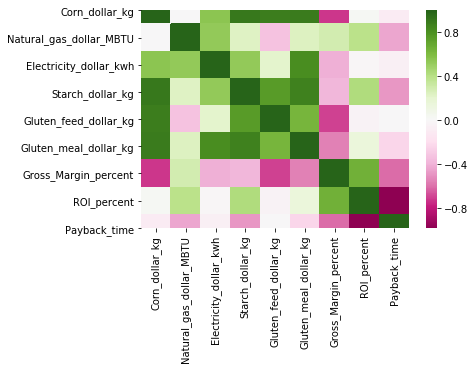

In [40]:
sns.heatmap(corr, cmap = 'PiYG')

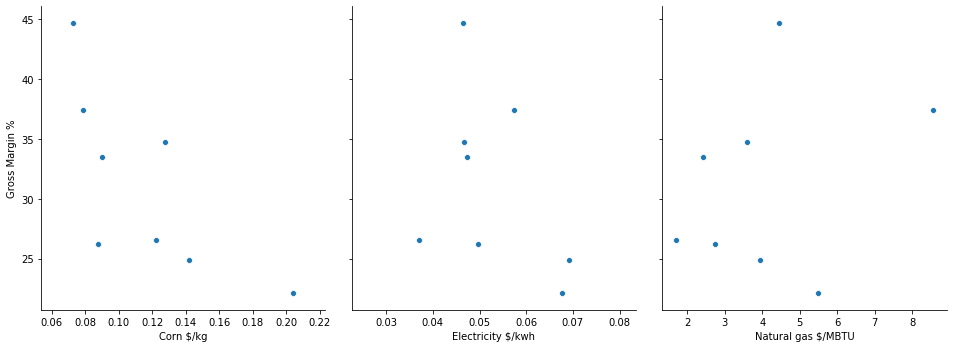

In [9]:
sns.pairplot(df, x_vars = ['Corn $/kg','Electricity $/kwh','Natural gas $/MBTU'], y_vars = 'Gross Margin %',height = 5, aspect=0.9)

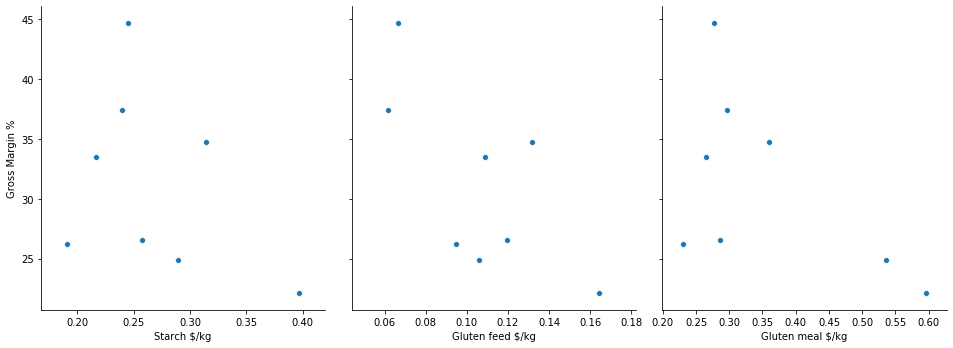

In [10]:
sns.pairplot(df, x_vars = ['Starch $/kg','Gluten feed $/kg','Gluten meal $/kg'], y_vars = 'Gross Margin %',height = 5, aspect=0.9)

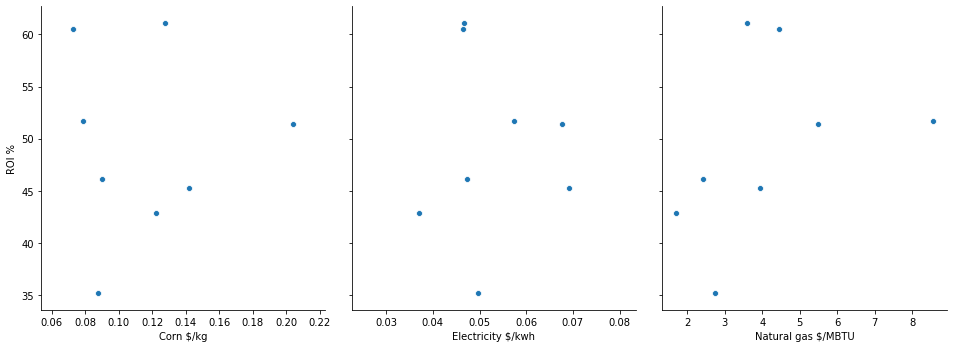

In [11]:
sns.pairplot(df, x_vars = ['Corn $/kg','Electricity $/kwh','Natural gas $/MBTU'], y_vars = 'ROI %',height = 5, aspect=0.9)

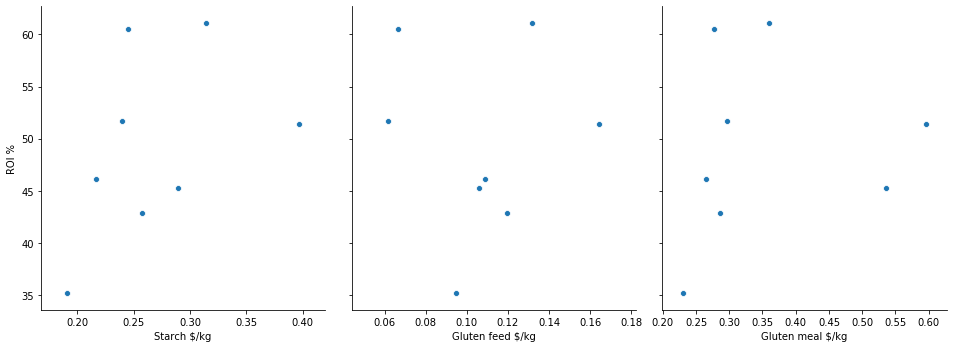

In [12]:
sns.pairplot(df, x_vars = ['Starch $/kg','Gluten feed $/kg','Gluten meal $/kg'], y_vars = 'ROI %',height = 5, aspect=0.9)

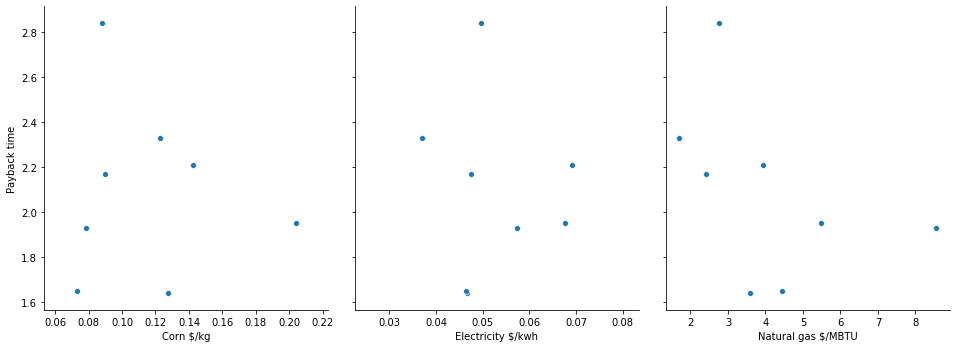

In [13]:
sns.pairplot(df, x_vars = ['Corn $/kg','Electricity $/kwh','Natural gas $/MBTU'], y_vars = 'Payback time',height = 5, aspect=0.9)

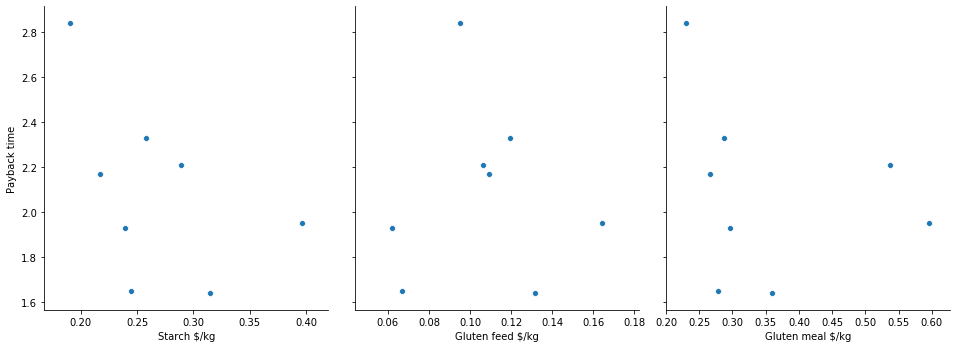

In [14]:
sns.pairplot(df, x_vars = ['Starch $/kg','Gluten feed $/kg','Gluten meal $/kg'], y_vars = 'Payback time',height = 5, aspect=0.9)

<Figure size 720x576 with 0 Axes>

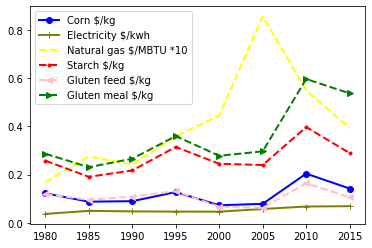

<Figure size 720x576 with 0 Axes>

In [15]:
plt.plot( 'Year', 'Corn $/kg', data=df, marker='o', color='b', linewidth=2)
plt.plot( 'Year', 'Electricity $/kwh', data=df, marker='+', color='olive', linewidth=2)
plt.plot( df['Year'],df['Natural gas $/MBTU']/10, marker='', color='yellow', linewidth=2, linestyle='dashed', label = 'Natural gas $/MBTU *10')
plt.plot( 'Year', 'Starch $/kg', data=df, marker='.', color='red', linewidth=2, linestyle='dashed')
plt.plot( 'Year', 'Gluten feed $/kg', data=df, marker='<', color='pink', linewidth=2, linestyle='dashed')
plt.plot( 'Year', 'Gluten meal $/kg', data=df, marker='>', color='green', linewidth=2, linestyle='dashed')
#plt.plot( 'Year', 'Gross Margin %', data=df, marker='', color='olive', linewidth=2, linestyle='dashed')
#plt.plot( 'Year', 'ROI %', data=df, marker='', color='olive', linewidth=2, linestyle='dashed')
#plt.plot( 'Year', 'Payback time', data=df, marker='', color='purple', linewidth=2, linestyle='dashed')
plt.legend()
plt.figure(figsize=(10,8))

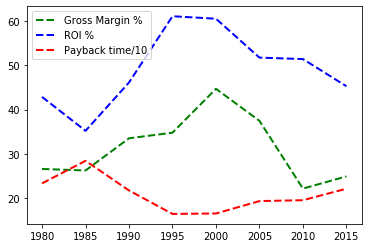

In [16]:
plt.plot( 'Year', 'Gross Margin %', data=df, marker='', color='green', linewidth=2, linestyle='dashed')
plt.plot( 'Year', 'ROI %', data=df, marker='', color='b', linewidth=2, linestyle='dashed')
plt.plot( df['Year'],df['Payback time']*10, marker='', color='r', linewidth=2, linestyle='dashed', label= 'Payback time/10')
plt.legend()

In [43]:
from statsmodels.formula.api import ols
model = ols("Gross_Margin_percent ~ Corn_dollar_kg+Natural_gas_dollar_MBTU+Electricity_dollar_kwh", df1).fit()

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Gross_Margin_percent   R-squared:                       0.665
Model:                              OLS   Adj. R-squared:                  0.414
Method:                   Least Squares   F-statistic:                     2.647
Date:                  Sat, 07 Dec 2019   Prob (F-statistic):              0.185
Time:                          22:49:52   Log-Likelihood:                -22.697
No. Observations:                     8   AIC:                             53.39
Df Residuals:                         4   BIC:                             53.71
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  48.2325     10.733      4.494      0.011      18.432      78.033
Corn_dollar_kg            -88.7663     67.353     -1.318      0.258    -275.767      98.234
Natural_gas_dollar_MBTU     1.7340      1.336      1.298      0.264      -1.976       5.444
Electricity_dollar_kwh   -262.5895    310.608     -0.845      0.445   -1124.976     599.797
==============================================================================
Omnibus:                        0.223   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.895   Jarque-Bera (JB):                0.359
Skew:                           0.252   Prob(JB):                        0.836
Kurtosis:                       2.092   Cond. No.                         710.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""